In [1]:
%matplotlib ipympl

import mne 
import os
import matplotlib.pyplot as plt
import numpy as np
from mne_icalabel import label_components
import numpy as np
import pyprep
import collections

In [2]:
XY_keys = "M/P, P/M, M/P, M/P, M/P, P/M, P/M, M/P, P/M, P/M, M/P, P/M, P/M, M/P, P/M, M/P, P/M, P/M, P/M, M/P, M/P, M/P, M/P, M/P, P/M, M/P, P/M, M/P, M/P, P/M, M/P, M/P, P/M, P/M, M/P, P/M, M/P, M/P, P/M, M/P, P/M, P/M, M/P, P/M, M/P, P/M, M/P, M/P, P/M, M/P, M/P, M/P, P/M, M/P, P/M, M/P, M/P, P/M, P/M, M/P, P/M, M/P, P/M, M/P, M/P, P/M, M/P, P/M, M/P, M/P, M/P, P/M, M/P, M/P, M/P, M/P, P/M, P/M, M/P, M/P"
XY_keys = XY_keys.split(", ")

new_XY_keys = []
for i in range(len(XY_keys)):
    new_XY_keys.append((XY_keys[i][0], XY_keys[i][2]))

#removing nr 70 as the patient is missing
del new_XY_keys[69]

# Selecting channels
picks = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'ECG EKG']

def LoadRaw(folder, path, patient_number, picks=picks):
    raw_liste = []
    #finding all files for specific person
    for file in os.listdir(folder):
        filename = os.fsdecode(file)
        fname = path+filename
        person_number = filename[:2]
        if person_number[0] == 0:
            person_number = person_number[1]
        pn = int(person_number)

        if pn == patient_number:
            raw = mne.io.read_raw_edf(fname, verbose=False, preload=filename[0:5])
            annot = raw.annotations
            annot_dict = raw.annotations.count()

            # Changing annotations
            if 'Tiltale-X' in annot_dict:
                if new_XY_keys[int(filename[0:1])][0] == "P":
                    title = "Familiar voice"
                else:
                    title = "Medical staff"
                annot.rename({'Tiltale-X': title})
            if 'Tiltale-Y' in annot_dict:
                if new_XY_keys[int(filename[0:1])][1] == "P":
                    title = "Familiar voice"
                else:
                    title = "Medical staff"
                annot.rename({'Tiltale-Y': title})
            annot_dict = raw.annotations.count()

            #renaming channels
            channels = raw.info.ch_names
            channels_rename = [i.replace('EEG ','') for i in channels]
            channels_rename = [i.replace('-REF','') for i in channels_rename]
            chan_dict = dict(zip(channels,channels_rename))
            mne.rename_channels(raw.info, chan_dict)
            channels = raw.info.ch_names

            if picks != None:
                raw.pick(picks)

            #setting channel types
            channel_dict = {'ECG EKG':'ecg'}
            raw.set_channel_types(channel_dict, verbose=False)

            #setting montage type
            montage = mne.channels.make_standard_montage("standard_1020")
            raw.set_montage(montage)

            raw_liste.append(raw)

            print(raw_liste)

            if len(raw_liste) != 1:
                raw_con = mne.concatenate_raws(raw_liste)
            else:
                raw_con = raw_liste[0]

    return raw_con, annot, annot_dict

In [3]:
path ="EDF_test/"
folder = os.fsencode(path)
raw, annot, annot_dict = LoadRaw(folder, path, 3)

[<RawEDF | 03TN-EDF+.edf, 20 x 470250 (1881.0 s), ~71.8 MB, data loaded>]
[<RawEDF | 03TN-EDF+.edf, 20 x 470250 (1881.0 s), ~71.8 MB, data loaded>, <RawEDF | 03TN-EDF+1.edf, 20 x 7750 (31.0 s), ~1.2 MB, data loaded>]
[<RawEDF | 03TN-EDF+.edf, 20 x 478000 (1912.0 s), ~73.0 MB, data loaded>, <RawEDF | 03TN-EDF+1.edf, 20 x 7750 (31.0 s), ~1.2 MB, data loaded>, <RawEDF | 03TN-EDF+2.edf, 20 x 12500 (50.0 s), ~1.9 MB, data loaded>]
[<RawEDF | 03TN-EDF+.edf, 20 x 498250 (1993.0 s), ~76.1 MB, data loaded>, <RawEDF | 03TN-EDF+1.edf, 20 x 7750 (31.0 s), ~1.2 MB, data loaded>, <RawEDF | 03TN-EDF+2.edf, 20 x 12500 (50.0 s), ~1.9 MB, data loaded>, <RawEDF | 03TN-EDF+3.edf, 20 x 6000 (24.0 s), ~966 kB, data loaded>]
[<RawEDF | 03TN-EDF+.edf, 20 x 524500 (2098.0 s), ~80.1 MB, data loaded>, <RawEDF | 03TN-EDF+1.edf, 20 x 7750 (31.0 s), ~1.2 MB, data loaded>, <RawEDF | 03TN-EDF+2.edf, 20 x 12500 (50.0 s), ~1.9 MB, data loaded>, <RawEDF | 03TN-EDF+3.edf, 20 x 6000 (24.0 s), ~966 kB, data loaded>, <RawED

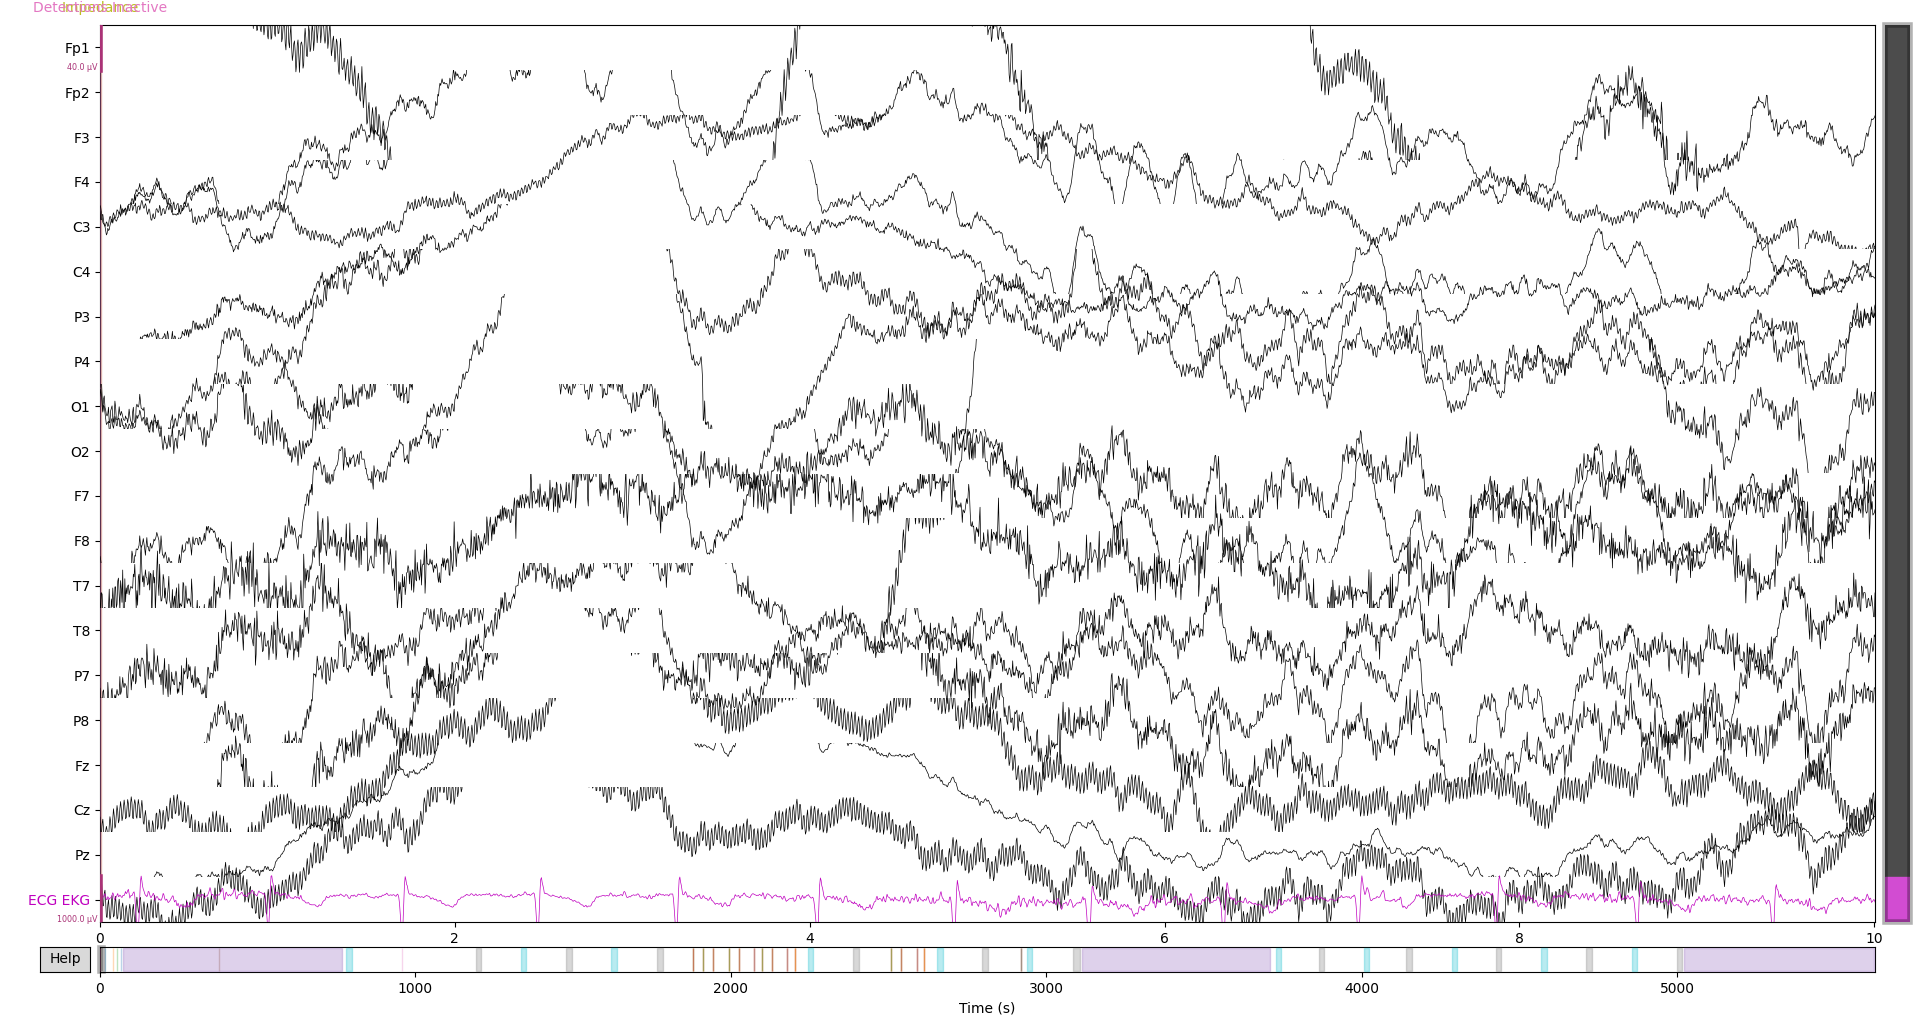

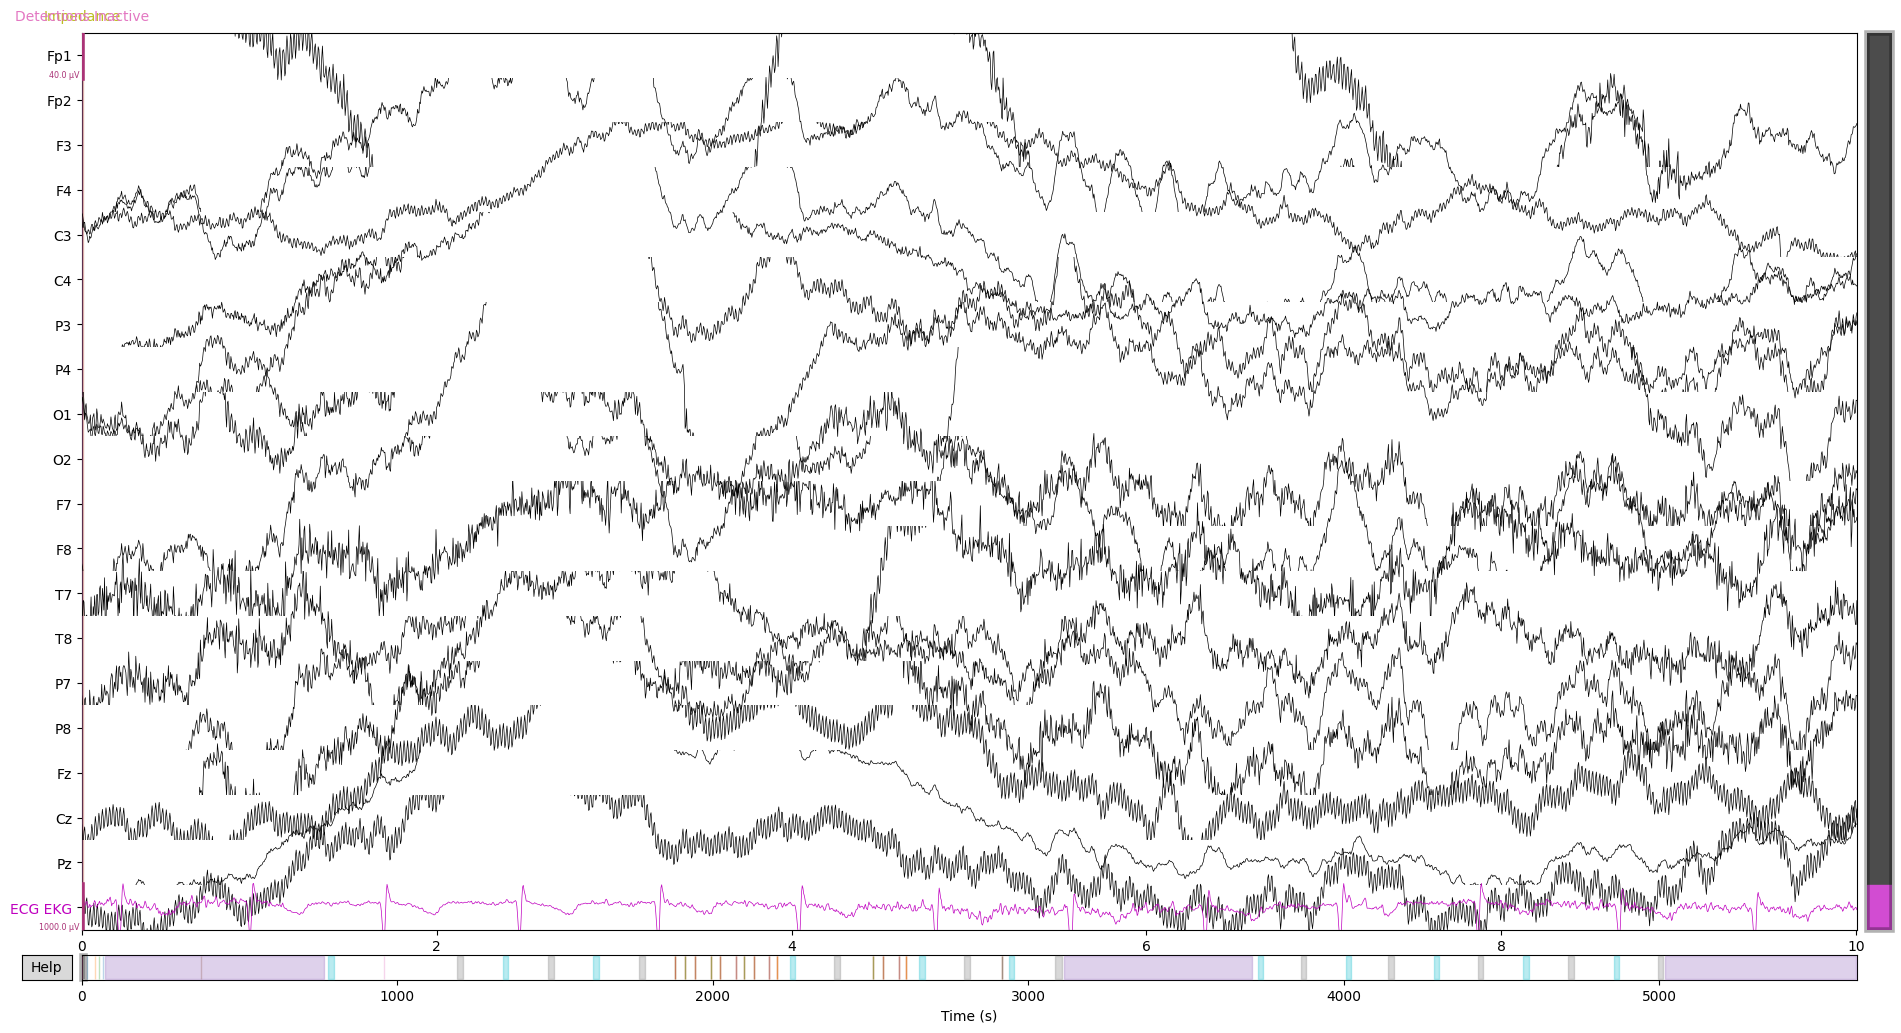

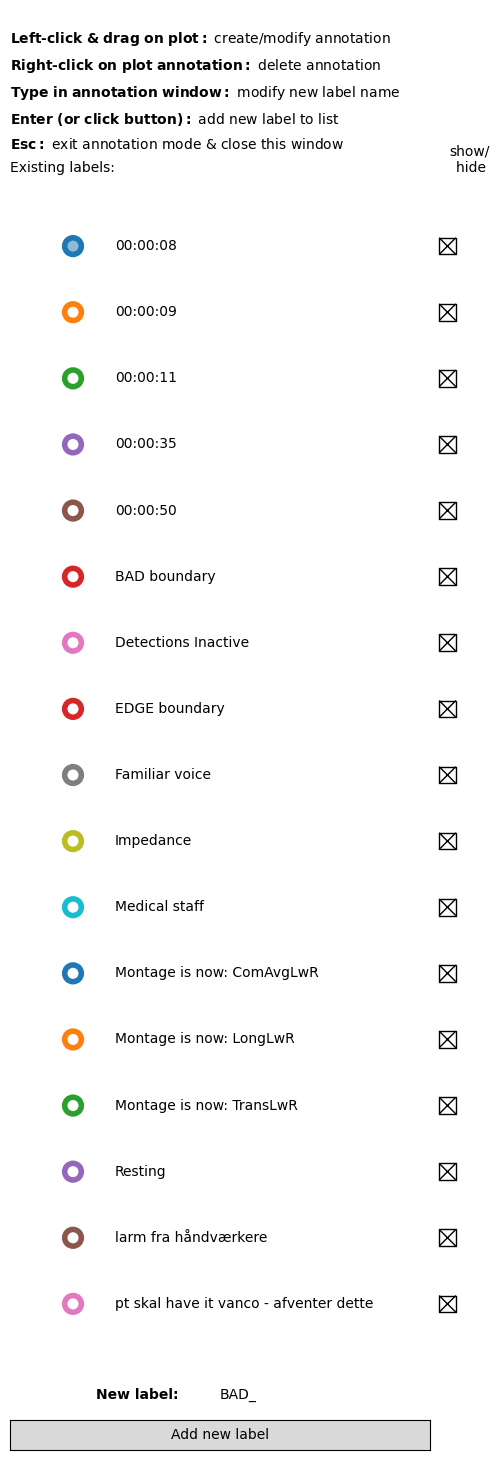

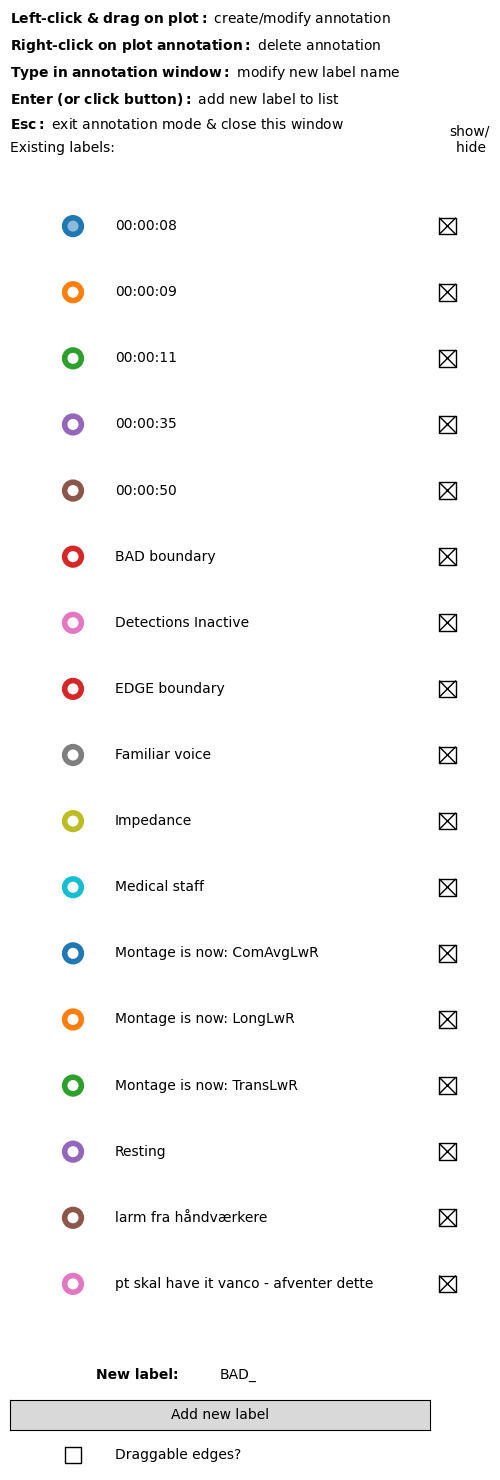

In [36]:
raw.plot()

In [37]:
raw.annotations.count()

{'00:00:08': 1,
 '00:00:09': 2,
 '00:00:11': 5,
 '00:00:35': 3,
 '00:00:50': 4,
 'BAD boundary': 15,
 'BAD_': 14,
 'Detections Inactive': 1,
 'EDGE boundary': 15,
 'Familiar voice': 11,
 'Impedance': 16,
 'Medical staff': 11,
 'Montage is now: ComAvgLwR': 2,
 'Montage is now: LongLwR': 1,
 'Montage is now: TransLwR': 1,
 'Resting': 3,
 'larm fra håndværkere': 1,
 'pt skal have it vanco - afventer dette': 1}

In [42]:
def reject_bad_segs(raw, annot_to_reject = ''):
    """ This function rejects all time spans annotated as annot_to_reject and concatenates the rest"""
    # this implementation seemed buggy, modified it here
    raw_segs = []
    tmin = 0
    for jsegment in range(1, len(raw.annotations)):
        #print(raw.annotations.description[jsegment], annot_to_reject)
        
        if raw.annotations.description[jsegment] == annot_to_reject:  # Append all other than 'bad_ITI'
             # start at ending of last bad annot
            tmax = raw.annotations.onset[jsegment] - 0.001 # end at onset of current bad annot
            raw_segs.append(
                raw.copy().crop( # this retains raw between tmin and tmax
                    tmin=tmin, 
                    tmax=tmax,
                    include_tmax=False, # this is onset of bad annot
                )
            )
            tmin = raw.annotations.onset[jsegment] + raw.annotations.duration[jsegment] + 0.001
            #print(tmin, tmax, len(raw_segs))
    
    print('tmin: ', tmin)
    raw_segs.append(raw.copy().crop(tmin=tmin))
    print(len(raw_segs))
    return mne.concatenate_raws(raw_segs)

In [43]:
raw_con = reject_bad_segs(raw, annot_to_reject = 'BAD_')

tmin:  2614.184502535211
15


In [48]:

for jsegment in range(1, len(raw_con.annotations)):
    #print(raw.annotations.description[jsegment], annot_to_reject)
    
    if raw_con.annotations.description[jsegment] == 'BAD_':
        d = raw_con.annotations.duration[jsegment]
        print(d)

0.00039
0.000958
0.00043
0.00178
0.000149
0.000757
0.001465
0.000117
0.001827
0.001258
0.000809
0.000739
0.000503


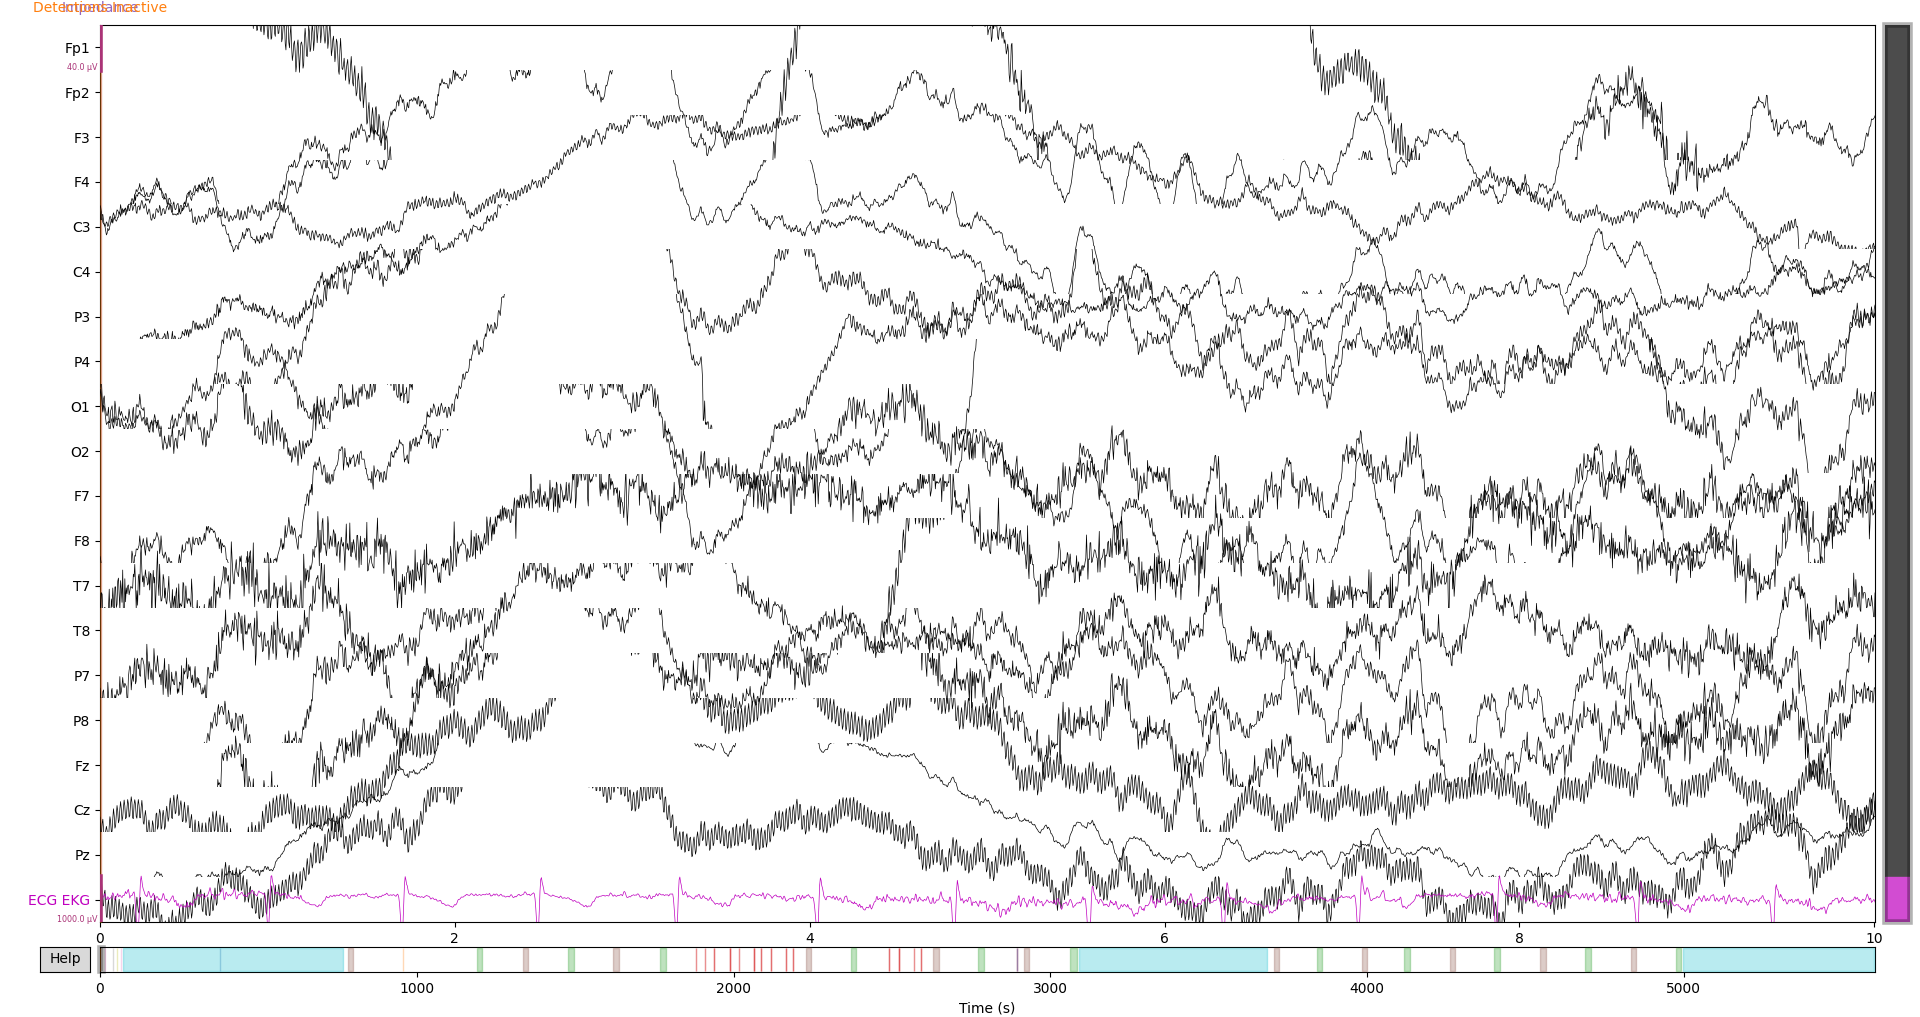

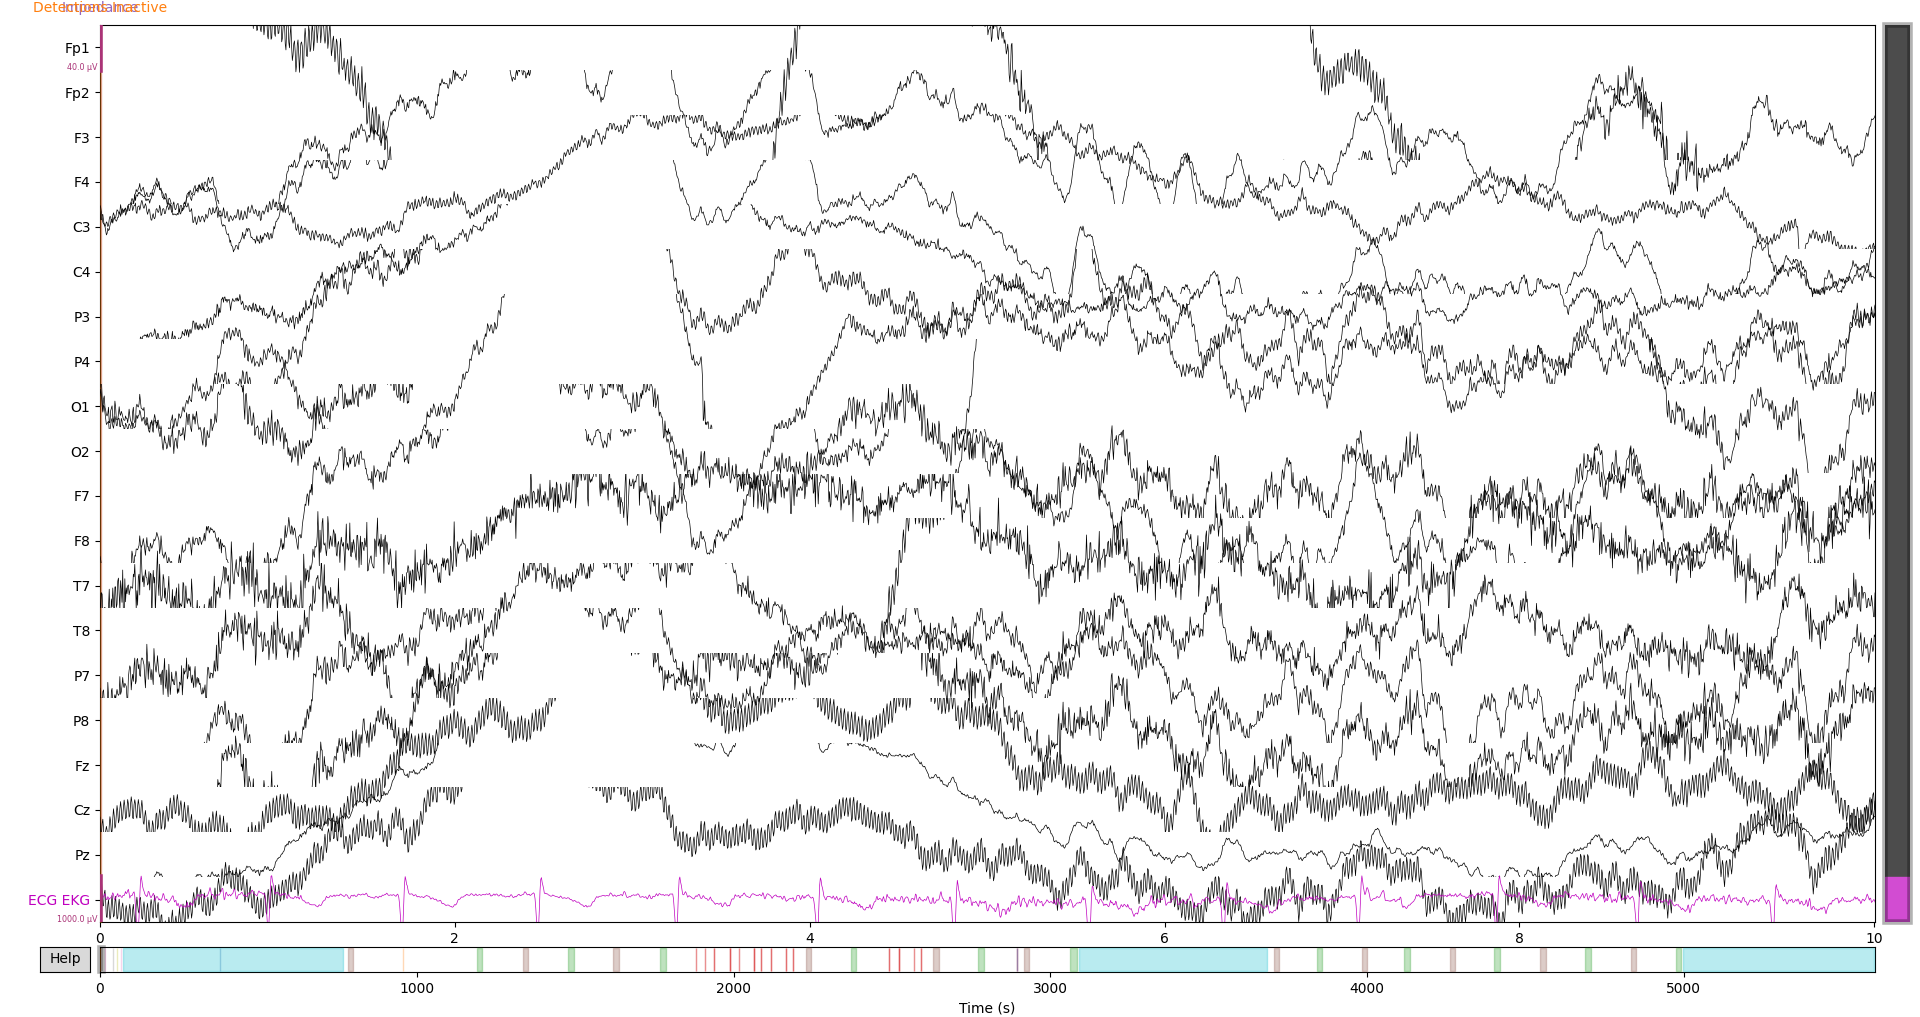

In [41]:
raw_con.plot()
plt.show()

In [4]:
from scipy.stats import spearmanr

from fooof import FOOOF, FOOOFGroup
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_model
from fooof.plts.aperiodic import plot_aperiodic_params
from fooof.sim.params import Stepper, param_iter
from fooof.sim import gen_power_spectrum, gen_group_power_spectra
from fooof.utils.params import compute_time_constant, compute_knee_frequency

C:\Users\KSOE0397\AppData\Local\Temp\ipykernel_12460\1540053377.py:3: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF, FOOOFGroup
2024-04-24 11:22:53,767 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


In [5]:
events_from_annot, event_dict = mne.events_from_annotations(raw=raw)
#print(events_from_annot)
#print(event_dict)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, ecg=True, exclude='bads')
epochs = mne.Epochs(raw, events_from_annot, event_id=event_dict, tmin=-0.2, tmax=15, proj=True, picks=picks, baseline=None, preload=True, event_repeated='merge', on_missing='warn')
rest = epochs['Resting']
med = epochs['Medical staff']
fam = epochs['Familiar voice']


Used Annotations descriptions: ['00:00:08', '00:00:09', '00:00:11', '00:00:35', '00:00:50', 'Detections Inactive', 'Familiar voice', 'Impedance', 'Medical staff', 'Montage is now: ComAvgLwR', 'Montage is now: LongLwR', 'Montage is now: TransLwR', 'Resting', 'larm fra håndværkere', 'pt skal have it vanco - afventer dette']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 3801 original time points ...
16 bad epochs dropped


In [14]:
psd = rest[0].compute_psd()

    Using multitaper spectrum estimation with 7 DPSS windows


In [21]:
psds, freqs = psd.get_data(return_freqs=True)

In [37]:
#print(psds)
freqs2 = np.asarray([freqs]*(len(raw.ch_names)-1))
print(freqs.shape)
print(psds[0].shape)

(1901,)
(19, 1901)


In [50]:
fm = FOOOFGroup()
fm.fit(freqs,psds[0])


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 19 power spectra.


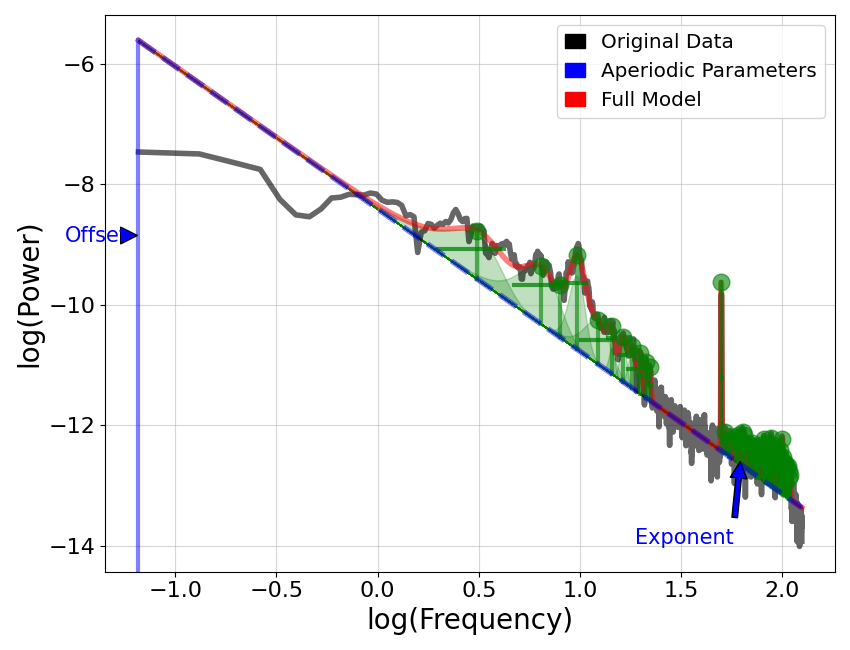

In [18]:
plot_annotated_model(fm, annotate_peaks=False, annotate_aperiodic=True, plt_log=True)
plt.show()

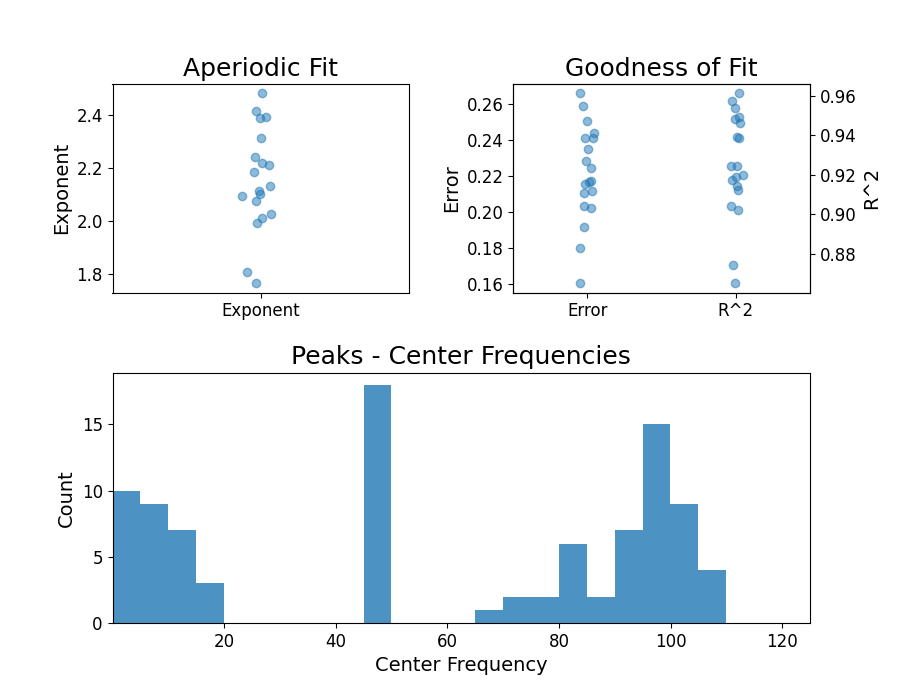

In [46]:
fm.plot()
plt.show()

In [43]:
slope = -fm.get_params('aperiodic_params','exponent')
slope_mean = np.mean(slope)
slope_std = np.std(slope)
#off_set = fm.get_params('aperiodic_params','off_set')
print(slope_mean, slope_std)

-2.2395111042379106 0.20897984738967976


In [45]:
slope = -fm.get_params('aperiodic_params','exponent')
slope_mean = np.mean(slope)
slope_std = np.std(slope)
#off_set = fm.get_params('aperiodic_params','off_set')
print(slope_mean, slope_std)

-2.1565996733098367 0.1892863879264093


In [48]:
slope = -fm.get_params('aperiodic_params','exponent')
slope_mean = np.mean(slope)
slope_std = np.std(slope)
#off_set = fm.get_params('aperiodic_params','off_set')
print(slope_mean, slope_std)

-2.242198388348238 0.2096404600352186


In [51]:
slope = -fm.get_params('aperiodic_params','exponent')
slope_mean = np.mean(slope)
slope_std = np.std(slope)
#off_set = fm.get_params('aperiodic_params','off_set')
print(slope_mean, slope_std)

-2.2395111042379106 0.20897984738967976


In [20]:
slope = -fm.aperiodic_params_[1]
off_set = fm.aperiodic_params_[0]
print(slope,off_set)

-2.36189233499311 -8.410715257487364
